# Plotting

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio
%matplotlib inline

In [20]:
prolife_word_cnt = pd.read_csv('prolife_word_count.txt', sep=" ", header = None)
prolife_word_cnt.columns = ["word", "count"]

In [21]:
prolife_word_cnt.head(20)

,word,count
0,abortion,12662
1,prolife,10106
2,s,8335
3,rt,7763
4,life,6669
5,pro,3495
6,baby,3109
7,via,2924
8,women,2542
9,parenthood,2457


In [22]:
prochoice_word_cnt = pd.read_csv('prochoice_word_count.txt', sep=" ", header = None)
prochoice_word_cnt.columns = ["word", "count"]

In [23]:
prochoice_word_cnt.head(20)

,word,count
0,abortion,19350
1,s,14190
2,rt,13158
3,women,10060
4,us,4047
5,can,3880
6,via,3732
7,access,3264
8,will,3147
9,choice,3120


In [24]:
Prolife = np.array([0.11, 0.12, 0.32, 0.02, 0.123, 0.03, 0.09, 0.08, 0.02, 0.087])
Prochoice = np.array([0.03, 0.00, 0.07, 0.12, 0.10, 0.24, 0.16, 0.17, 0.1, 0.01])
Unknown = np.array([0.026, 0.11, 0.15, 0.13, 0.06, 0.12, 0.14, 0.05, 0.04, 0.17])
prolife_dist = np.linalg.norm(Prolife-Unknown)
prochoice_dist = np.linalg.norm(Prochoice-Unknown)
print(prolife_dist)
print(prochoice_dist)

0.266296826868
0.280385448981


In [25]:
merge_word_count = prolife_word_cnt.merge(prochoice_word_cnt, how = 'inner', on = 'word')
merge_word_count.columns = ["word", "count_prolife", "count_prochoice"]
merge_word_count['difference(prolife-prochoice)'] = merge_word_count["count_prolife"] - merge_word_count["count_prochoice"]

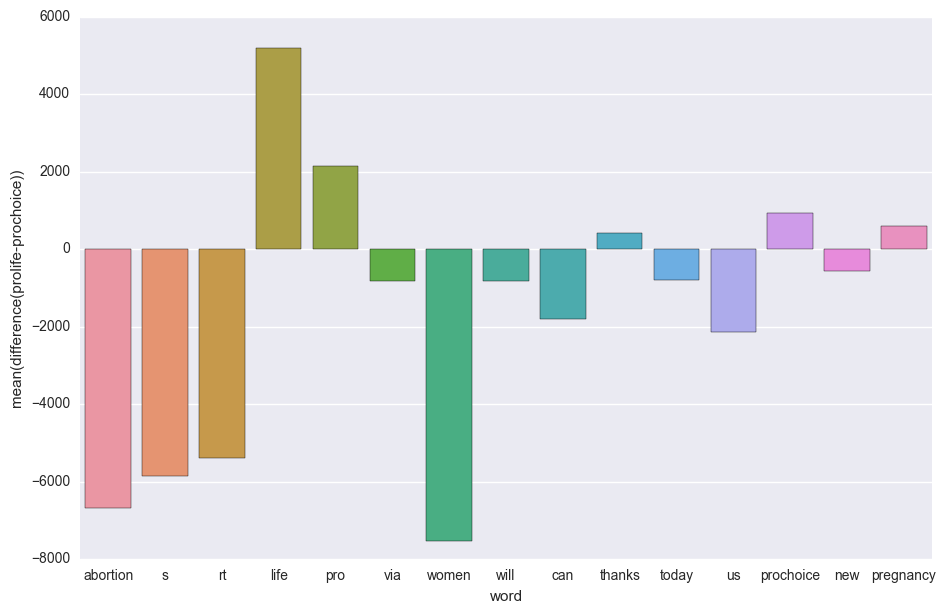

In [26]:
a4_dims = (11, 7)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.barplot(x="word", y="difference(prolife-prochoice)" , data=merge_word_count[:15], capsize = 0.2)

In [27]:
merge_word_count.shape

(59, 4)

In [ ]:
a4_dims = (11, 7)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.barplot(x="word", y="difference(prolife-prochoice)" , data=merge_word_count[15:25], capsize = 0.2)

In [ ]:
1-sum([0.026, 0.11, 0.15, 0.13, 0.06, 0.12, 0.14, 0.05, 0.04, 0.17])

In [33]:
# Read in the file
abortion_mat = sio.loadmat("abortion.mat")
# Understand the data content
abortion_mat.keys()
# Get the training data
train_data = abortion_mat['training_data']
# Get the training label
train_labels = abortion_mat['training_labels'][0]
# Check the amount of data in the training set
print(train_data.shape)
print(train_labels.shape)

(62, 9)
(62,)


In [43]:
prolife_ex = train_data[1]
prochoice_ex = train_data[59]
unknown = train_data[31]
prolife_ex = np.array([i/sum(prolife_ex) for i in prolife_ex])
prochoice_ex = np.array([i/sum(prochoice_ex) for i in prochoice_ex])
unknown = np.array([i/sum(unknown) for i in unknown])
print("prolife_ex",prolife_ex, "\n")
print("prochoice_ex", prochoice_ex, "\n")
print("unknown", unknown, "\n")

prolife_ex [ 0.31491713  0.02430939  0.2         0.00220994  0.16243094  0.21436464
  0.03977901  0.00220994  0.03977901] 

prochoice_ex [ 0.21440726  0.          0.2728304   0.32161089  0.0153148   0.00680658
  0.00567215  0.04367555  0.11968236] 

unknown [ 0.35107731  0.00633714  0.19518378  0.09885932  0.05069708  0.07604563
  0.00126743  0.12040558  0.10012674] 



In [44]:
prolife_dist = np.linalg.norm(prolife_ex-unknown)
prochoice_dist = np.linalg.norm(prochoice_ex-unknown)
print(prolife_dist)
print(prochoice_dist)

0.248408252893
0.294451009499


In [45]:
train_labels[31]

0